## Case Study: ShopEase

**Company Background:** ShopEase (an online e-commerce retailer) who deals in Retail, specializing in a wide range of products (electronics, home goods, apparel, etc.)

**Problem Statement :** ShopEase receives thousands of customer reviews daily. Manually going through reviews to identify major themes (e.g., product quality, delivery issues, pricing, customer support) is time-consuming and inefficient.

**Goal :** Automate the process of discovering key topics in customer feedback. This will help ShopEase’s customer service and product teams quickly address concerns and improve overall customer satisfaction. See the sentiments of the customers; are the positive or negative

**Approach :** Apply LDA (Latent Dirichlet Allocation) to identify core topics and summarize common concerns and highlight areas of improvement

- Part 1: Topic Modeling
- Part 2: Sentiment Analysis

## Solution: Part 1: Topic Modeling

### 1. Set Up & Data Loading

In [55]:
# !pip install wordcloud

In [179]:
# 1.1 Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# For text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# For topic modeling
import gensim
from gensim import corpora
from gensim.models import LdaModel

# 1.2 Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# 1.3 Load the Dataset
df = pd.read_csv("shopease_reviews_small_v1.csv")

# 1.4 Preview Data
print("First 5 rows of the dataset:")
display(df.head())

print("\nBasic Info about the DataFrame:")
display(df.info())

# 1.5 Check for Missing Values
missing_values = df.isna().sum()
print("\nMissing values in each column:")
print(missing_values)


First 5 rows of the dataset:


,review_text,rating,category,timestamp
0,Customer service was unhelpful regarding my Ho...,5,Home & Kitchen,2022-06-09
1,My Sports & Outdoors order got delayed. Not cool!,4,Sports & Outdoors,2023-07-22
2,I'll definitely buy more Electronics products ...,5,Electronics,2023-03-11
3,This Sports & Outdoors item exceeded my expect...,3,Sports & Outdoors,2022-12-14
4,"Honestly, I've had better Books items before. ...",2,Books,2021-09-13



Basic Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  10000 non-null  object
 1   rating       10000 non-null  int64 
 2   category     10000 non-null  object
 3   timestamp    10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


None


Missing values in each column:
review_text    0
rating         0
category       0
timestamp      0
dtype: int64


### 2. Basic EDA & Visualization

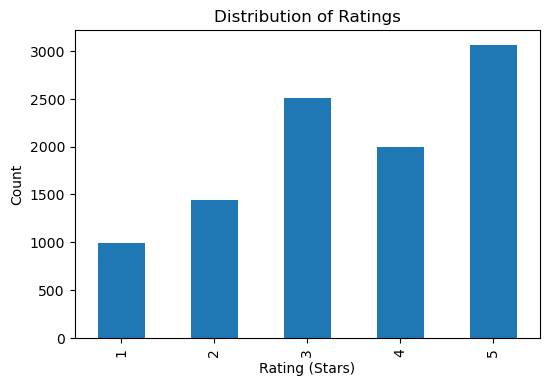

In [13]:
# 2.1 Distribution of Ratings
plt.figure(figsize=(6,4))
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Ratings")
plt.xlabel("Rating (Stars)")
plt.ylabel("Count")
plt.show()

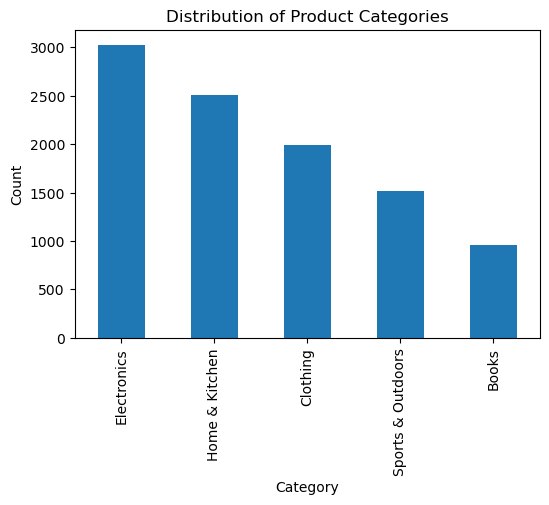

In [15]:
# 2.2 Distribution of Categories
plt.figure(figsize=(6,4))
df['category'].value_counts().plot(kind='bar')
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### 3. Data Cleaning & Text Preprocessing


In [117]:
# 3.1 Remove Duplicate Reviews
df.drop_duplicates(subset="review_text", inplace=True)


In [119]:
# 3.2 Handle Missing or Empty Reviews (if any)
df = df.dropna(subset=["review_text"])

In [121]:
# 3.3 Prepare Stopwords
stop_words = set(stopwords.words('english'))

In [123]:

# 3.4 Define a Preprocessing Function
def preprocess_text(text):
    """
    1. Lowercase the text
    2. Tokenize
    3. Remove non-alphanumeric tokens
    4. Remove stopwords
    """
    tokens = word_tokenize(text.lower())                  # Lowercase & tokenize
    tokens = [t for t in tokens if t.isalnum()]           # Keep only alphanumeric
    tokens = [t for t in tokens if t not in stop_words]   # Remove stopwords
    return tokens


In [125]:
# 3.5 Apply Preprocessing
df['tokens'] = df['review_text'].apply(preprocess_text)


In [126]:
print("Preview 'tokens' column after preprocessing:")
display(df[['review_text','tokens']].head(5))

Preview 'tokens' column after preprocessing:


,review_text,tokens
0,Customer service was unhelpful regarding my Ho...,"[customer, service, unhelpful, regarding, home..."
1,My Sports & Outdoors order got delayed. Not cool!,"[sports, outdoors, order, got, delayed, cool]"
2,I'll definitely buy more Electronics products ...,"[definitely, buy, electronics, products, recie..."
3,This Sports & Outdoors item exceeded my expect...,"[sports, outdoors, item, exceeded, expectation..."
4,"Honestly, I've had better Books items before. ...","[honestly, better, books, items, satisfied, re..."


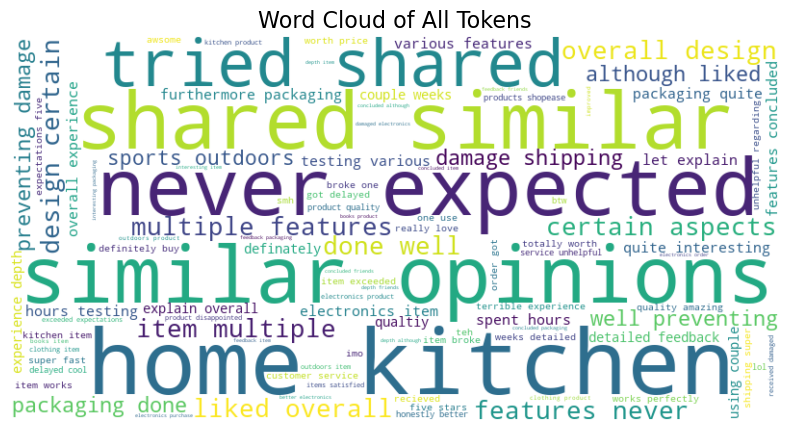

In [129]:
# Combine all preprocessed tokens back into a single string
all_tokens_str = " ".join([" ".join(tokens) for tokens in df['tokens']])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=100
).generate(all_tokens_str)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of All Tokens", fontsize=16)
plt.show()


### 4. Further EDA: Top Words After Preprocessing

In [132]:
# 4.1 Combine All Tokens into a Single List
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

In [134]:
# 4.2 Frequency Distribution
freq_dist = nltk.FreqDist(all_tokens)

In [136]:
# 4.3 Display Top 20 Most Common Words
top_20 = freq_dist.most_common(20)
print("Top 20 most common words:\n", top_20)

Top 20 most common words:
 [('item', 2470), ('electronics', 1492), ('features', 1457), ('packaging', 1422), ('overall', 1410), ('shipping', 1366), ('kitchen', 1281), ('home', 1269), ('experience', 1096), ('clothing', 1052), ('product', 1034), ('tried', 913), ('similar', 913), ('friends', 912), ('shared', 910), ('opinions', 910), ('also', 908), ('expected', 895), ('never', 894), ('multiple', 884)]


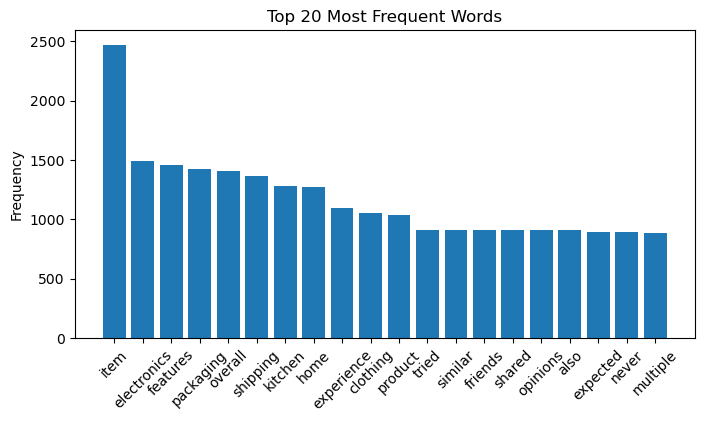

In [138]:
# 4.4 Visualize Top 20 Words
top_words, top_counts = zip(*top_20)
plt.figure(figsize=(8,4))
plt.bar(top_words, top_counts)
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

### 5. Topic Modeling with LDA
Create Dictionary and Corpus for LDA

In [141]:
# Create a dictionary mapping (word -> id)
dictionary = corpora.Dictionary(df['tokens'])

# Convert each tokenized review to a bag-of-words representation
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

print(f"Dictionary size: {len(dictionary)} words")
print("Sample Bag-of-Words for the first review:")
print(corpus[0][:10])  # show first 10 word-frequency pairs


Dictionary size: 99 words
Sample Bag-of-Words for the first review:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [143]:
# Let's choose 5 topics for demonstration
num_topics = 5

# Train LDA
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=5,        # Number of passes through the corpus
                     random_state=42) # For reproducibility

# Print out the topics
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=5):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.059*"similar" + 0.059*"friends" + 0.059*"tried" + 0.058*"shared" + 0.058*"also"
Topic 1: 0.040*"feedback" + 0.040*"detailed" + 0.040*"weeks" + 0.040*"using" + 0.040*"couple"
Topic 2: 0.093*"item" + 0.048*"experience" + 0.047*"satisfied" + 0.047*"honestly" + 0.047*"terrible"
Topic 3: 0.075*"features" + 0.063*"overall" + 0.040*"never" + 0.040*"expected" + 0.040*"multiple"
Topic 4: 0.054*"item" + 0.049*"price" + 0.049*"perfectly" + 0.049*"totally" + 0.048*"worth"


Word Cloud for Each Topic

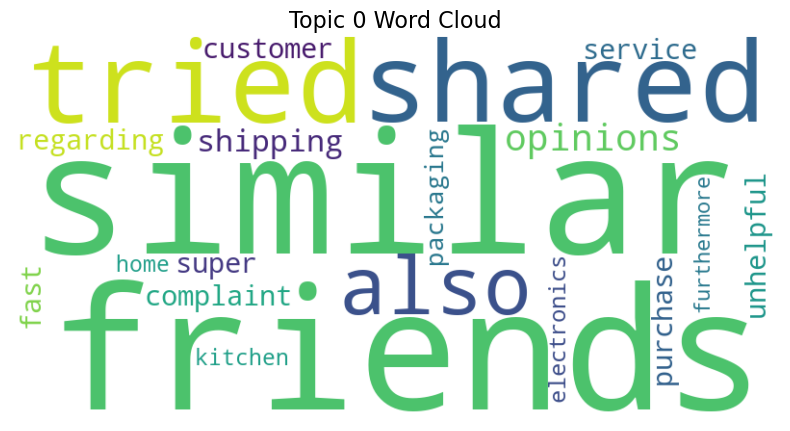

In [146]:
# Suppose we want a word cloud for Topic 0
topic_0 = lda_model.show_topic(0, topn=20)  # Top 20 words for Topic 0
# topic_0 is a list of tuples: [(word, probability), (word, probability), ...]

# Convert top words to a dict with {word: weight}
word_freq = {word_prob[0]: abs(word_prob[1]) for word_prob in topic_0}

wordcloud_topic0 = WordCloud(
    width=800, 
    height=400,
    background_color="white"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_topic0, interpolation="bilinear")
plt.axis("off")
plt.title("Topic 0 Word Cloud", fontsize=16)
plt.show()


Topic 0:
  similar         0.0586
  friends         0.0585
  tried           0.0585
  shared          0.0585
  also            0.0584
  opinions        0.0584
  shipping        0.0408
  complaint       0.0332
  service         0.0329
  regarding       0.0329
  unhelpful       0.0327
  super           0.0325
  fast            0.0325
  customer        0.0323
  purchase        0.0323
  packaging       0.0245
  electronics     0.0199
  kitchen         0.0181
  home            0.0179
  furthermore     0.0159
----------------------------------------
Topic 1:
  feedback        0.0400
  detailed        0.0400
  weeks           0.0400
  using           0.0399
  couple          0.0398
  product         0.0395
  shopease        0.0369
  buy             0.0365
  definitely      0.0365
  products        0.0364
  received        0.0362
  disappointed    0.0359
  packaging       0.0355
  damaged         0.0355
  done            0.0245
  preventing      0.0242
  well            0.0242
  damage        

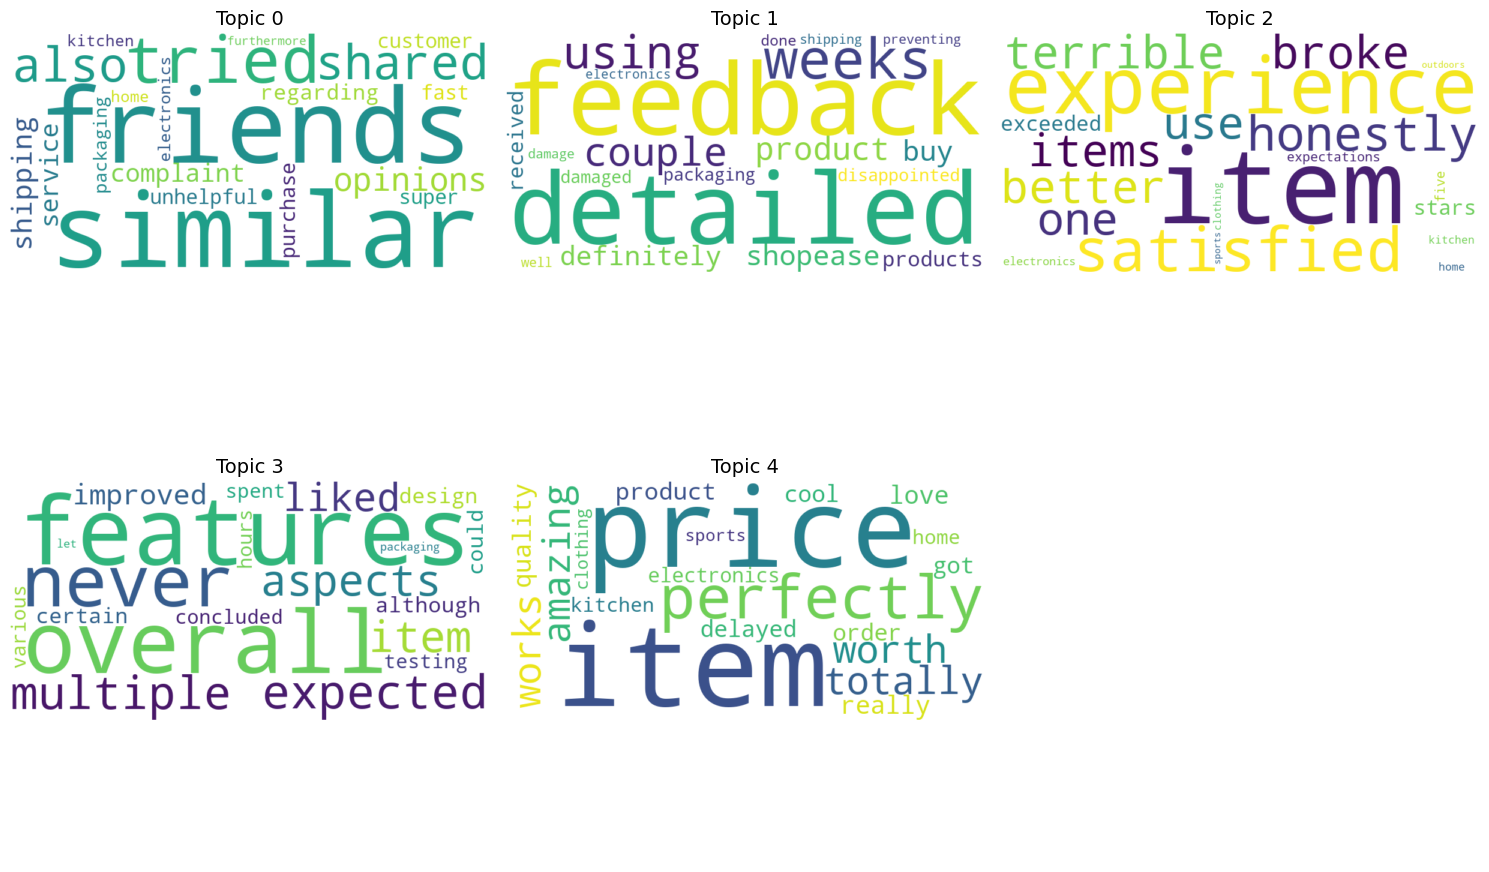

In [82]:
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_topic_wordclouds(lda_model, num_words=20):
    """
    Generate a word cloud for each topic in an LDA model and print top words in the console.
    Arranges all topic word clouds into two rows.
    
    Parameters:
    -----------
    lda_model : gensim.models.ldamodel.LdaModel
        The trained LDA model.
    num_words : int
        Number of top words to include in each topic's word cloud.
    """
    # 1. Determine the number of topics in the model
    num_topics = lda_model.num_topics  # or pass in if known

    # 2. Calculate how many columns we need for 2 rows
    rows = 2
    cols = math.ceil(num_topics / 2)

    # 3. Create a figure and a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()  # Flatten to easily iterate

    # 4. For each topic, build a frequency dict and generate a word cloud
    for topic_id in range(num_topics):
        # Get top (word, weight) pairs for the topic
        topic_tuples = lda_model.show_topic(topic_id, topn=num_words)
        
        # Print the topic words and their weights in the console
        print(f"Topic {topic_id}:")
        for word, weight in topic_tuples:
            print(f"  {word:15} {weight:.4f}")
        print("-" * 40)

        # Convert to dict {word: weight} for the word cloud
        freq_dict = {word: abs(weight) for word, weight in topic_tuples}

        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white"
        ).generate_from_frequencies(freq_dict)

        # 5. Plot the word cloud on its subplot
        axes[topic_id].imshow(wordcloud, interpolation="bilinear")
        axes[topic_id].axis("off")
        axes[topic_id].set_title(f"Topic {topic_id}", fontsize=14)

    # 6. If there's an extra subplot (for an odd number of topics), turn it off
    for idx in range(topic_id + 1, rows * cols):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()


# ----------------------
# Example Usage:
# Assuming you have an LDA model named "lda_model" already trained,
# simply call:
plot_topic_wordclouds(lda_model, num_words=20)


## 6. Interpreting Topics & Assigning Topics to Each Review

In [149]:
# 6.1 Get Topic Distribution for Each Document
doc_topics = []
for bow_doc in corpus:
    topic_prob = lda_model.get_document_topics(bow_doc)
    # Sort topics by highest probability
    topic_prob_sorted = sorted(topic_prob, key=lambda x: x[1], reverse=True)
    # Top topic is the one with the highest probability
    top_topic = topic_prob_sorted[0][0]
    doc_topics.append(top_topic)

df['dominant_topic'] = doc_topics

# 3. Now we can do sentiment vs. topic
topic_sentiment = df.groupby(["dominant_topic", "sentiment_label"])["review_text"].count().reset_index()

# 6.2 Show Some Sample Reviews with Assigned Topic
print(df[['review_text', 'dominant_topic']].head(10))


                                         review_text  dominant_topic
0  Customer service was unhelpful regarding my Ho...               0
1  My Sports & Outdoors order got delayed. Not cool!               4
2  I'll definitely buy more Electronics products ...               1
3  This Sports & Outdoors item exceeded my expect...               2
4  Honestly, I've had better Books items before. ...               0
5  Received smh a damaged Electronics product. Ve...               1
6  I really love this Home & Kitchen product! The...               4
7  I really love this Home & Kitchen product! The...               4
8  I really love this Home & Kitchen product! The...               4
9  Terrible experience with this Clothing item. I...               3


### 7. Visualizing Topic Distribution


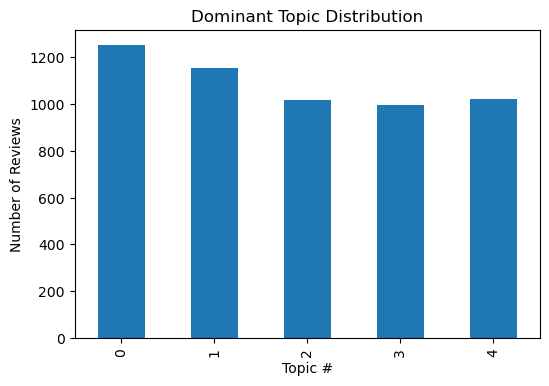

In [51]:
# Count how many reviews fall under each topic
topic_counts = df['dominant_topic'].value_counts().sort_index()

plt.figure(figsize=(6,4))
topic_counts.plot(kind='bar')
plt.title("Dominant Topic Distribution")
plt.xlabel("Topic #")
plt.ylabel("Number of Reviews")
plt.show()


## Solution: Part 2: Sentiment Analysis

VADER analyzes the original text (not the tokenized version) because it handles punctuation, exclamation marks, and other cues.

### 1 Apply VADER (Valence Aware Dictionary for Sentiment Reasoning) to Each Review

In [89]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rakes\AppData\Roaming\nltk_data...


### 2 Apply VADER to Each Review

In [91]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    """
    Returns the 'compound' VADER sentiment score, 
    which ranges from -1 (most negative) to +1 (most positive).
    """
    return sia.polarity_scores(text)['compound']

# Apply sentiment analysis on original reviews (df['review_text'])
df['sentiment_score'] = df['review_text'].apply(get_sentiment_score)

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

df[['review_text','sentiment_score','sentiment_label']].head(10)


,review_text,sentiment_score,sentiment_label
0,Customer service was unhelpful regarding my Ho...,-0.2960,Negative
1,My Sports & Outdoors order got delayed. Not cool!,-0.4860,Negative
2,I'll definitely buy more Electronics products ...,0.4019,Positive
3,This Sports & Outdoors item exceeded my expect...,0.0000,Neutral
4,"Honestly, I've had better Books items before. ...",0.7998,Positive
5,Received smh a damaged Electronics product. Ve...,-0.6369,Negative
6,I really love this Home & Kitchen product! The...,0.8620,Positive
7,I really love this Home & Kitchen product! The...,0.8620,Positive
8,I really love this Home & Kitchen product! The...,0.8620,Positive
9,Terrible experience with this Clothing item. I...,-0.7345,Negative


### 3. Visualizing Sentiment Distribution

**Overall Sentiment Distribution**

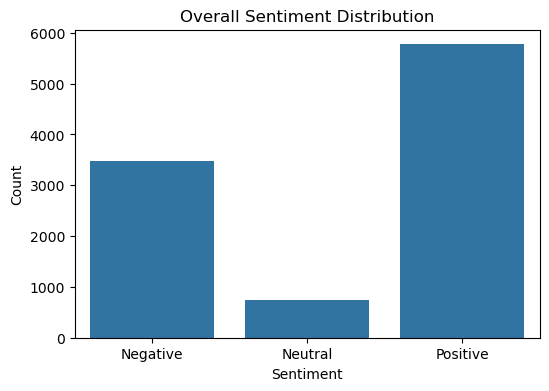

In [100]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df, order=["Negative","Neutral","Positive"])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


**Sentiment by Rating**

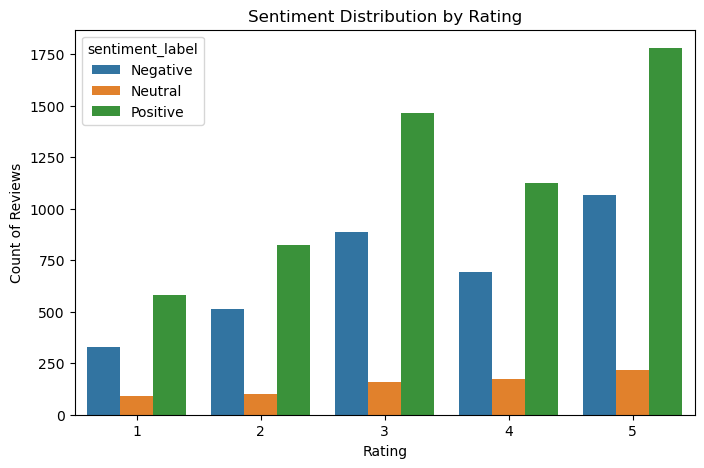

In [104]:
# Group by rating and sentiment_label
rating_sentiment = df.groupby(['rating','sentiment_label'])['review_text'].count().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='rating', y='review_text', hue='sentiment_label', data=rating_sentiment)
plt.title("Sentiment Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Count of Reviews")
plt.show()


**Sentiment by Topic**

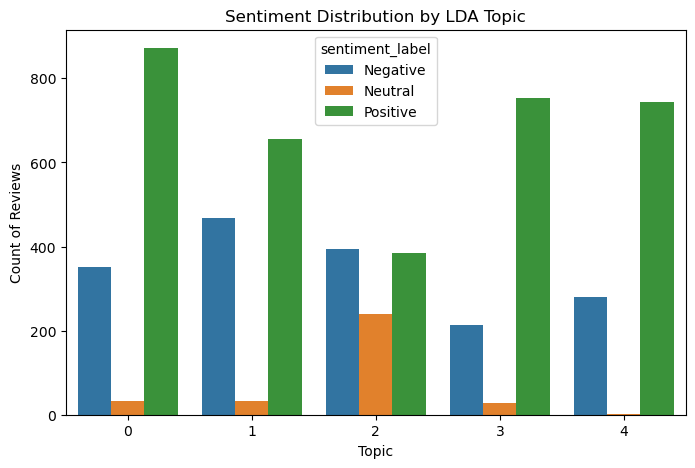

In [152]:
topic_sentiment = df.groupby(['dominant_topic', 'sentiment_label'])['review_text'].count().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='dominant_topic', y='review_text', hue='sentiment_label', data=topic_sentiment)
plt.title("Sentiment Distribution by LDA Topic")
plt.xlabel("Topic")
plt.ylabel("Count of Reviews")
plt.show()


## Final Insights

In [156]:
# 1.1 Print Basic Distribution Insights
print("=== Topic Distribution ===")
topic_counts = df["dominant_topic"].value_counts()
print(topic_counts)

print("\n=== Sentiment Distribution ===")
sentiment_counts = df["sentiment_label"].value_counts()
print(sentiment_counts)

print("\n=== Combined Topic & Sentiment Distribution ===")
combined_dist = df.groupby(["dominant_topic", "sentiment_label"]).size().reset_index(name="Count")
print(combined_dist)

# 1.2 Show Some Sample Reviews Per Topic
# For instance, print up to 3 reviews from each topic to see typical text
num_samples = 3
for topic_id in sorted(df["dominant_topic"].unique()):
    sample_reviews = df[df["dominant_topic"] == topic_id]["review_text"].head(num_samples)
    print(f"\nTopic {topic_id} - Sample Reviews:")
    for review in sample_reviews:
        print(f" - {review}")


=== Topic Distribution ===
dominant_topic
0    1255
1    1156
4    1024
2    1019
3     996
Name: count, dtype: int64

=== Sentiment Distribution ===
sentiment_label
Positive    3408
Negative    1708
Neutral      334
Name: count, dtype: int64

=== Combined Topic & Sentiment Distribution ===
    dominant_topic sentiment_label  Count
0                0        Negative    351
1                0         Neutral     32
2                0        Positive    872
3                1        Negative    469
4                1         Neutral     32
5                1        Positive    655
6                2        Negative    394
7                2         Neutral    240
8                2        Positive    385
9                3        Negative    214
10               3         Neutral     29
11               3        Positive    753
12               4        Negative    280
13               4         Neutral      1
14               4        Positive    743

Topic 0 - Sample Reviews:
 - Custom

In [158]:
# 2.1 Export to CSV
df.to_csv("shopease_analyzed.csv", index=False)
print("\nFinal file with topics and sentiment saved as 'shopease_analyzed.csv'.")


Final file with topics and sentiment saved as 'shopease_analyzed.csv'.


# Enhancements

## Enhancement 1. Coherence Score Table/Chart

- CoherenceModel from gensim measures how semantically consistent the topics are.
- We vary num_topics from 2 to 10 and record the c_v coherence
- Higher coherence typically indicates better topic separation


In [164]:
import gensim
from gensim.models import CoherenceModel

In [166]:
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    """
    Compute c_v coherence for various number of topics.
    Returns:
        model_list: List of LDA topic models
        coherence_values: Coherence values corresponding to each model
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit + 1, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            update_every=1,
            chunksize=100,
            passes=5,
            alpha="auto",
            per_word_topics=True
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model,
            texts=texts,
            dictionary=dictionary,
            coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


In [168]:
# Example usage:
start, limit, step = 2, 10, 1  # testing from 2 to 10 topics
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=df["tokens"],
    start=start,
    limit=limit,
    step=step
)

In [170]:
# Print coherence scores
for num_topics, coh in zip(range(start, limit+1, step), coherence_values):
    print(f"Num Topics = {num_topics}, Coherence Score = {coh:.4f}")

Num Topics = 2, Coherence Score = 0.6338
Num Topics = 3, Coherence Score = 0.5382
Num Topics = 4, Coherence Score = 0.4624
Num Topics = 5, Coherence Score = 0.4807
Num Topics = 6, Coherence Score = 0.3945
Num Topics = 7, Coherence Score = 0.3486
Num Topics = 8, Coherence Score = 0.3716
Num Topics = 9, Coherence Score = 0.3650
Num Topics = 10, Coherence Score = 0.3689


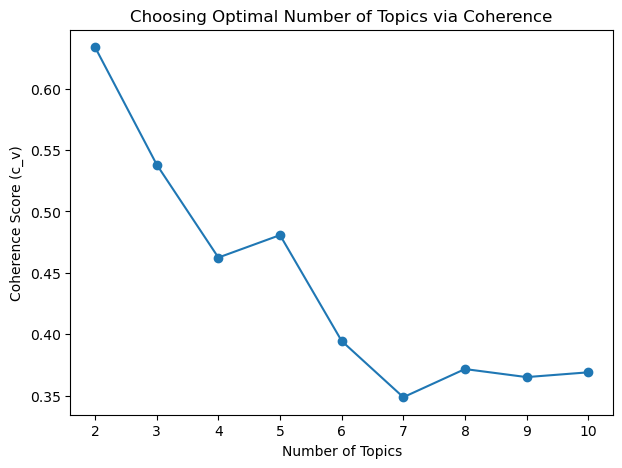

In [172]:
x = range(start, limit+1, step)
plt.figure(figsize=(7,5))
plt.plot(x, coherence_values, marker="o")
plt.xticks(x)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Choosing Optimal Number of Topics via Coherence")
plt.show()

## Enhancement 2: Bar Chart Showing Average Sentiment Score per Topic

Once we settle on a single num_topics and create your final LDA model, then 
- Assign dominant_topic to each review
- Compute a sentiment_score for each review (e.g., via VADER)

- Then, we can measure how each topic leans in sentiment by averaging the sentiment scores

In [177]:
# Group by topic, compute average sentiment
topic_sentiment_avg = df.groupby("dominant_topic")["sentiment_score"].mean().reset_index()
topic_sentiment_avg.rename(columns={"sentiment_score":"avg_sentiment"}, inplace=True)
print(topic_sentiment_avg)

   dominant_topic  avg_sentiment
0               0       0.381584
1               1       0.061391
2               2      -0.029446
3               3       0.435984
4               4       0.438022


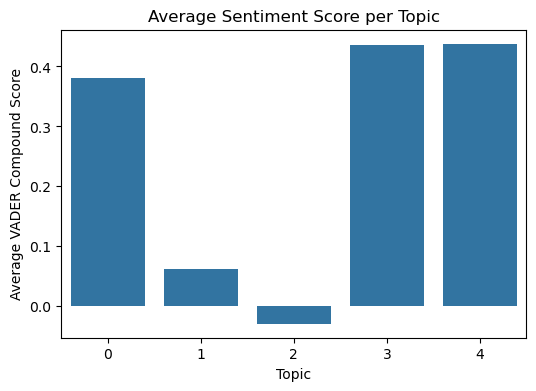

In [181]:
# Plot the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x="dominant_topic", y="avg_sentiment", data=topic_sentiment_avg)
plt.title("Average Sentiment Score per Topic")
plt.xlabel("Topic")
plt.ylabel("Average VADER Compound Score")
plt.show()

## Enhancement 3: Pivot Table of Average Rating per Topic

Our data includes a rating column (1 to 5 stars), we can check which topics are associated with higher or lower star ratings. This can guide which issues are causing negative ratings.

In [185]:
# Create a pivot table
topic_rating_pivot = df.pivot_table(
    index="dominant_topic",
    values="rating",
    aggfunc="mean"
).reset_index()

topic_rating_pivot.rename(columns={"rating":"avg_rating"}, inplace=True)
print(topic_rating_pivot)

   dominant_topic  avg_rating
0               0    3.401594
1               1    3.458478
2               2    3.493621
3               3    3.438755
4               4    3.525391


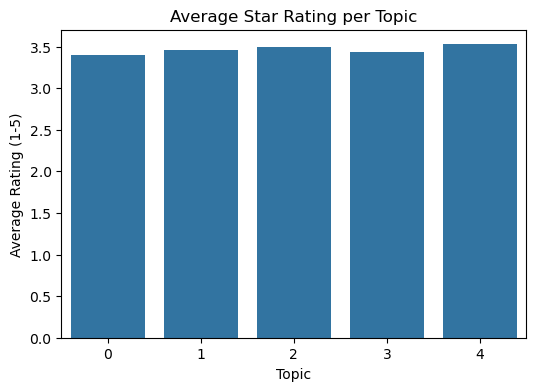

In [187]:
# Optional: Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x="dominant_topic", y="avg_rating", data=topic_rating_pivot)
plt.title("Average Star Rating per Topic")
plt.xlabel("Topic")
plt.ylabel("Average Rating (1-5)")
plt.show()

### All enhancements together

In [192]:
# After you have done all steps and have a final df:

print("=== Coherence-based Optimal Num Topics chosen: X ===")
print("=== Average Sentiment per Topic ===")
topic_sentiment_avg = df.groupby("dominant_topic")["sentiment_score"].mean()
print(topic_sentiment_avg)

print("\n=== Average Rating per Topic ===")
topic_rating = df.groupby("dominant_topic")["rating"].mean()
print(topic_rating)

# Plot them in bar charts, etc...
# (As shown in the code samples above)


=== Coherence-based Optimal Num Topics chosen: X ===
=== Average Sentiment per Topic ===
dominant_topic
0    0.381584
1    0.061391
2   -0.029446
3    0.435984
4    0.438022
Name: sentiment_score, dtype: float64

=== Average Rating per Topic ===
dominant_topic
0    3.401594
1    3.458478
2    3.493621
3    3.438755
4    3.525391
Name: rating, dtype: float64
